In [2]:
import json
import os



In [3]:
# TRAIN_FILE_2000 = '.data/train_top2000.jsonl'
# DEV_FILE_2000 = '.data/train_top2000_dev.jsonl'
TRAIN_FILE_100 = '.data/train_top100.jsonl'
DEV_FILE_100 = '.data/train_top100_dev.jsonl'

def parse_jsonl(file_path, num_lines=5):
    output = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for _ in range(num_lines):
            data = json.loads(file.readline().strip())
            output.append(data)

    return output


def get_nq_tokens(simplified_nq_example):
  """Returns list of blank separated tokens."""

  if "document_text" not in simplified_nq_example:
    raise ValueError("`get_nq_tokens` should be called on a simplified NQ"
                     "example that contains the `document_text` field.")

  return simplified_nq_example["document_text"].split(" ")


def get_short_answers(nq_example):
    document_tokens = get_nq_tokens(nq_example)
    print(len(nq_example['annotations']))
    short_answers = []
    for annotation in nq_example['annotations']:
        if annotation['short_answers']:
            for short_answer in annotation['short_answers']:
                short_answer_text = ' '.join(
                    document_tokens[
                        short_answer['start_token']:short_answer['end_token']]
                    )
                short_answers.append(short_answer_text)
    return short_answers

def strip_end_punctuation(text):
    # Common punctuation marks to remove from the end
    punctuation = '.!?,;:)"'
    
    # Strip whitespace first, then remove punctuation from the end
    text = text.strip()
    while text and text[-1] in punctuation:
        text = text[:-1].strip()
    
    return text

In [4]:
json_top100 = parse_jsonl(TRAIN_FILE_100,100)
json_top100_dev = parse_jsonl(DEV_FILE_100,100)

In [22]:
json_top100_dev[0].keys()

dict_keys(['annotations', 'document_html', 'document_title', 'document_tokens', 'document_url', 'example_id', 'long_answer_candidates', 'question_text', 'question_tokens'])

In [20]:
json_top100_dev[0]['annotations']

get_short_answers(json_top100_dev[0])


ValueError: `get_nq_tokens` should be called on a simplified NQexample that contains the `document_text` field.

In [5]:
a = json_top100[1]

In [8]:
json_top100[0]['question_text']

'which is the most common use of opt-in e-mail marketing'

In [9]:
json_top100[0]['annotations']

[{'yes_no_answer': 'NONE',
  'long_answer': {'start_token': 1952,
   'candidate_index': 54,
   'end_token': 2019},
  'short_answers': [{'start_token': 1960, 'end_token': 1969}],
  'annotation_id': 593165450220027640}]

In [10]:
get_short_answers(json_top100[0])

1


["a newsletter sent to an advertising firm 's customers"]

In [28]:
for k,v in a.items():
    # print key and length of value if the value is iterable
    # otherwise print key and value
    if isinstance(v, list) or isinstance(v, str):
        print(f'"{k}"', type(v), len(v))
    else:
        print(f'"{k}"', type(v))



"document_text" <class 'str'> 19747
"long_answer_candidates" <class 'list'> 37
"question_text" <class 'str'> 39
"annotations" <class 'list'> 1
"document_url" <class 'str'> 98
"example_id" <class 'int'>


In [29]:
short_answer = get_short_answers(a)
print(short_answer)

1
['Tracy McConnell']


In [1]:
a

NameError: name 'a' is not defined

In [40]:
a

{'document_text': 'The Mother ( How I Met Your Mother ) - wikipedia <H1> The Mother ( How I Met Your Mother ) </H1> Jump to : navigation , search <Table> <Tr> <Th_colspan="2"> Tracy McConnell </Th> </Tr> <Tr> <Td_colspan="2"> How I Met Your Mother character </Td> </Tr> <Tr> <Td_colspan="2"> The Mother appearing in `` The Locket \'\' </Td> </Tr> <Tr> <Th> First appearance </Th> <Td> `` Lucky Penny ( unseen ) \'\' `` Something New \'\' ( seen ) </Td> </Tr> <Tr> <Th> Last appearance </Th> <Td> `` Last Forever \'\' </Td> </Tr> <Tr> <Th> Created by </Th> <Td> Carter Bays Craig Thomas </Td> </Tr> <Tr> <Th> Portrayed by </Th> <Td> Cristin Milioti </Td> </Tr> <Tr> <Th_colspan="2"> Information </Th> </Tr> <Tr> <Th> Aliases </Th> <Td> The Mother </Td> </Tr> <Tr> <Th> Gender </Th> <Td> Female </Td> </Tr> <Tr> <Th> Spouse ( s ) </Th> <Td> Ted Mosby </Td> </Tr> <Tr> <Th> Significant other ( s ) </Th> <Td> Max ( deceased former boyfriend ) Louis ( ex-boyfriend ) </Td> </Tr> <Tr> <Th> Children </Th> 

In [30]:
a['annotations']

[{'yes_no_answer': 'NONE',
  'long_answer': {'start_token': 212, 'candidate_index': 15, 'end_token': 310},
  'short_answers': [{'start_token': 213, 'end_token': 215}],
  'annotation_id': 12034874153783787365}]

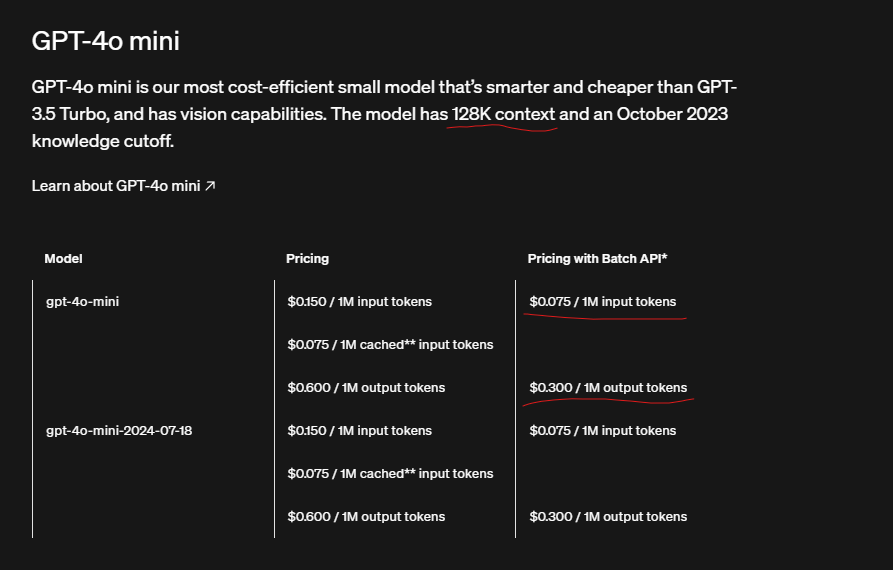

In [11]:
import openai
client = openai.OpenAI()

In [56]:
response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that provides concise answers."},
                {"role": "user", "content": f"Question: {a['question_text']}\nContext: {a['document_text']}\nProvide a brief answer(The answer has to be exactly from the context, which means the answer is a sub-sequence of the content):"}
            ]
        )
gpt_answer = response.choices[0].message.content

In [57]:
gpt_answer


'Tracy McConnell, better known as "The Mother," is the title character from the CBS television sitcom How I Met Your Mother.'

In [58]:
start_end[0]

{'start_token': 213, 'end_token': 215}

In [59]:
print(a['question_text'])

document_tokens = get_nq_tokens(a)
short_answers = []
start_i = a['annotations'][0]['short_answers'][0]['start_token']
end_i = a['annotations'][0]['short_answers'][0]['end_token']
print(start_i, end_i)

lookaround = ' '.join(document_tokens[start_i-5:end_i+10])
i = 0
for c in lookaround:
    if i % 50 == 0:
        print('')
    else:
        print(c, end='')
    i += 1

how i.met your mother who is the mother
213 215

merican </Td> </Tr> </Table> <P> Tracy McConnell 
 better known as `` The Mother '' , is

In [60]:
response_2 = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a professional judge on the question and answer pair. Cut the answer to the shortest possible sub-sequence of the given answer that can answer the question."},
                {"role": "user", "content": f"Question: {a['question_text']}\nAnswer: {gpt_answer}\nProvide the shortest sub-sequence of the given answer that can answer the question(return the same answer if it is already the shortest):"}
            ]
        )

gpt_answer_2 = response_2.choices[0].message.content


In [61]:
gpt_answer_3 = strip_end_punctuation(gpt_answer_2.lower())
print(gpt_answer_3)

tracy mcconnell, also known as "the mother," is the title character from how i met your mother


In [66]:
response_3 = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a professional judge on the question and answer pair. Cut the answer to the shortest possible sub-sequence of the given answer that can answer the question."},
                {"role": "user", "content": f"Question: {a['question_text']}\nAnswer: {gpt_answer_3}\nProvide the shortest sub-sequence of the given answer that can answer the question(return the same answer if it is already the shortest):"}
            ]
        )

gpt_answer_3 = response_3.choices[0].message.content
gpt_answer_3

'tracy mcconnell'

In [12]:
def nq_agents(nq_example, verbose=False):
    # document_tokens = get_nq_tokens(nq_example)
    short_answer = get_short_answers(nq_example)

    # first agent: extract answer from context
    response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that provides concise answers."},
                {"role": "user", "content": f"Question: {nq_example['question_text']}\nContext: {nq_example['document_text']}\nProvide a brief answer(The answer has to be exactly from the context, which means the answer is a substring of the content):"}
            ]
        )
    gpt_answer = response.choices[0].message.content
    if verbose:
        print('initial_answer:', gpt_answer)

    # second agent: cut the answer to the shortest possible sub-sequence of the given answer that can answer the question
    response_2 = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a professional judge on the question and answer pair. Cut the answer to the shortest contiguous substring of the given answer that can answer the question."},
                {"role": "user", "content": f"Question: {nq_example['question_text']}\nAnswer: {gpt_answer}\nProvide the shortest contiguous substring of the given answer that can answer the question:"}
            ]
        )
    gpt_answer_2 = response_2.choices[0].message.content
    if verbose:
        print('reduced_answer:', gpt_answer_2)
    # Tool 1: remove end punctuation
    gpt_answer_3 = strip_end_punctuation(gpt_answer_2)
    # third agent: keep improving the answer until there is no change.
    gpt_answer_3_prev = ''
    while gpt_answer_3 != gpt_answer_3_prev:
        gpt_answer_3_prev = gpt_answer_3
        response_3 = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are a professional judge on the question and answer pair. Cut the answer to the shortest contiguous substring of the given answer that can answer the question."},
                {"role": "user", "content": f"Question: {nq_example['question_text']}\nAnswer: {gpt_answer_3}\nProvide the shortest contiguous substring of the given answer that can answer the question(return the same answer if it is already the shortest):"}
            ]
        )
        gpt_answer_3 = response_3.choices[0].message.content
        if verbose:
            print('improved_answer:', gpt_answer_3)
    if verbose:
        print('- '*10)
        print('gold_answer:', short_answer)
        print('final_answer:', gpt_answer_3)

    return gpt_answer_3


In [15]:
json_top100[0]['question_text']


'which is the most common use of opt-in e-mail marketing'

In [17]:
nq_agents(json_top100[3], verbose=True)

1
initial_answer: Human fertilization is the union of a human egg and sperm, usually occurring in the ampulla of the fallopian tube.
reduced_answer: internal fertilisation
improved_answer: internal fertilisation
- - - - - - - - - - 
gold_answer: []
final_answer: internal fertilisation


'internal fertilisation'

In [18]:
for problem in json_top100[20:30]:
    print(problem['question_text'])
    if problem['annotations'][0]['short_answers']:
        nq_agents(problem, verbose=True)
    else:
        print('----skipped----')
    print('=='*30)



what is the use of jdk in java
----skipped----
who needs to be in the car with a permit driver
1
initial_answer: A fully licensed driver must sit in the seat adjacent the new driver.
reduced_answer: A fully licensed driver must sit.
improved_answer: A fully licensed driver
improved_answer: A fully licensed driver
- - - - - - - - - - 
gold_answer: ['an adult licensed driver who is at least 21 years of age or older and in the passenger seat of the vehicle at all times']
final_answer: A fully licensed driver
god's not dead a light in the darkness release date
1
initial_answer: March 30, 2018
reduced_answer: March 30, 2018
improved_answer: March 30, 2018
- - - - - - - - - - 
gold_answer: ['March 30 , 2018']
final_answer: March 30, 2018
who plays young flo in the progressive commercials
----skipped----
i love it (feat. charli xcx) icona pop
----skipped----
the u.s. supreme court hears appeals from circuit courts
----skipped----
ru pauls drag race all stars 2 episode 3
----skipped----
who is

In [92]:
problem

{'document_text': 'List of Premier League broadcasters - wikipedia <H1> List of Premier League broadcasters </H1> Jump to : navigation , search <P> This is a list of television broadcasters which provide coverage of the Premier League , English football \'s top level competition , which is the most watched league in the world . The main broadcasters in the United Kingdom are Sky Sports , who broadcast 126 of the 168 televised games in the UK , and BT Sport . The BBC shows weekly highlights of the Premier League on its Match of the Day and Match of the Day 2 programmes on Saturdays and Sundays . </P> <P> The 168 UK televised games are also broadcast across the world ; the remaining 212 matches that are n\'t broadcast live in the UK are all broadcast elsewhere around the world . English - speaking countries ( excluding the UK ) are able to carry what is known as the \' International feed \' or \' World feed \' audio ; this is full match commentary provided by the Premier League . In Asia

In [93]:
Agent 1 should exact more content in the following

============================================================
what channel is the premier league on in france
1
initial_answer: SFR Sport, Canal+ Sport
reduced_answer: Canal+ Sport
improved_answer: Canal+ Sport
--------------------------------------------------
gold_answer: ['SFR Sport']
final_answer: Canal+ Sport

SyntaxError: invalid syntax (217812972.py, line 1)

In [94]:
a

{'document_text': 'The Mother ( How I Met Your Mother ) - wikipedia <H1> The Mother ( How I Met Your Mother ) </H1> Jump to : navigation , search <Table> <Tr> <Th_colspan="2"> Tracy McConnell </Th> </Tr> <Tr> <Td_colspan="2"> How I Met Your Mother character </Td> </Tr> <Tr> <Td_colspan="2"> The Mother appearing in `` The Locket \'\' </Td> </Tr> <Tr> <Th> First appearance </Th> <Td> `` Lucky Penny ( unseen ) \'\' `` Something New \'\' ( seen ) </Td> </Tr> <Tr> <Th> Last appearance </Th> <Td> `` Last Forever \'\' </Td> </Tr> <Tr> <Th> Created by </Th> <Td> Carter Bays Craig Thomas </Td> </Tr> <Tr> <Th> Portrayed by </Th> <Td> Cristin Milioti </Td> </Tr> <Tr> <Th_colspan="2"> Information </Th> </Tr> <Tr> <Th> Aliases </Th> <Td> The Mother </Td> </Tr> <Tr> <Th> Gender </Th> <Td> Female </Td> </Tr> <Tr> <Th> Spouse ( s ) </Th> <Td> Ted Mosby </Td> </Tr> <Tr> <Th> Significant other ( s ) </Th> <Td> Max ( deceased former boyfriend ) Louis ( ex-boyfriend ) </Td> </Tr> <Tr> <Th> Children </Th> 

In [95]:
full_data = parse_jsonl('.data/full_dataset/nq-train-00.jsonl',100)


In [101]:
b = full_data[0]

In [104]:
for key in a:
    print(key)
print('=='*30)
for key in b:
    print(key)

document_text
long_answer_candidates
question_text
annotations
document_url
example_id
annotations
document_html
document_title
document_tokens
document_url
example_id
long_answer_candidates
question_text
question_tokens


In [108]:
b['annotations']

[{'annotation_id': 6782080525527814293,
  'long_answer': {'candidate_index': 92,
   'end_byte': 96948,
   'end_token': 3538,
   'start_byte': 82798,
   'start_token': 2114},
  'short_answers': [{'end_byte': 96731,
    'end_token': 3525,
    'start_byte': 96715,
    'start_token': 3521}],
  'yes_no_answer': 'NONE'}]

In [111]:
import natural_questions as nq


In [117]:
text_utils.simplify_nq_example(b)



{'question_text': 'when is the last episode of season 8 of the walking dead',
 'example_id': 4549465242785278785,
 'document_url': 'https://en.wikipedia.org//w/index.php?title=The_Walking_Dead_(season_8)&amp;oldid=828222625',
 'document_text': 'The Walking Dead ( season 8 ) - Wikipedia <H1> The Walking Dead ( season 8 ) </H1> Jump to : navigation , search <Table> <Tr> <Th_colspan="2"> The Walking Dead ( season 8 ) </Th> </Tr> <Tr> <Td_colspan="2"> Promotional poster </Td> </Tr> <Tr> <Th> Starring </Th> <Td> <Ul> <Li> Andrew Lincoln </Li> <Li> Norman Reedus </Li> <Li> Lauren Cohan </Li> <Li> Chandler Riggs </Li> <Li> Danai Gurira </Li> <Li> Melissa McBride </Li> <Li> Lennie James </Li> <Li> Alanna Masterson </Li> <Li> Josh McDermitt </Li> <Li> Christian Serratos </Li> <Li> Seth Gilliam </Li> <Li> Ross Marquand </Li> <Li> Jeffrey Dean Morgan </Li> <Li> Austin Amelio </Li> <Li> Tom Payne </Li> <Li> Xander Berkeley </Li> <Li> Khary Payton </Li> <Li> Steven Ogg </Li> <Li> Katelyn Nacon </Li

In [114]:
dir(nq)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [116]:
from natural_questions import text_utils
